In [1]:
import tensorflow as tf

In [9]:
import cv2
import numpy as np
import pandas as pd
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [61]:
# Path to dataset: structured as "dataset/A/A1.jpg", "dataset/B/B2.jpg", etc.
DATASET_PATH = r"C:\Users\rbecc\OneDrive\Documents\GitHub\asl_dataset\asl_dataset"  #Replace with your dataset path
IMAGE_SIZE = (100, 100)

def load_images_and_labels(dataset_path):
    X = []
    y = []
    for label in sorted(os.listdir(dataset_path)):
        label_path = os.path.join(dataset_path, label)
        if not os.path.isdir(label_path):
            continue
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, IMAGE_SIZE)
            edges = cv2.Canny(img, 100, 200)
            X.append(edges.flatten())
            y.append(label)
    return np.array(X), np.array(y)

# Load data
print("Loading images...")
X, y = load_images_and_labels(DATASET_PATH)

Loading images...


In [62]:
def letters_to_numbers(char_list):
    """
    Convert list of letters a-z (or A-Z) to numbers 1-26.

    Args:
        char_list (list of str): List of single-character strings (a-z or A-Z).

    Returns:
        list of int: Corresponding numbers from 1 to 26.
    """
    return [ord(char.lower()) - ord('a') + 1 for char in char_list]
    
# Combine two colormaps to get at least 26 distinct colors
base_colors = plt.get_cmap('tab20').colors + plt.get_cmap('Set3').colors
distinct_colors = base_colors[:26]  # Take first 26

custom_cmap = ListedColormap(distinct_colors)

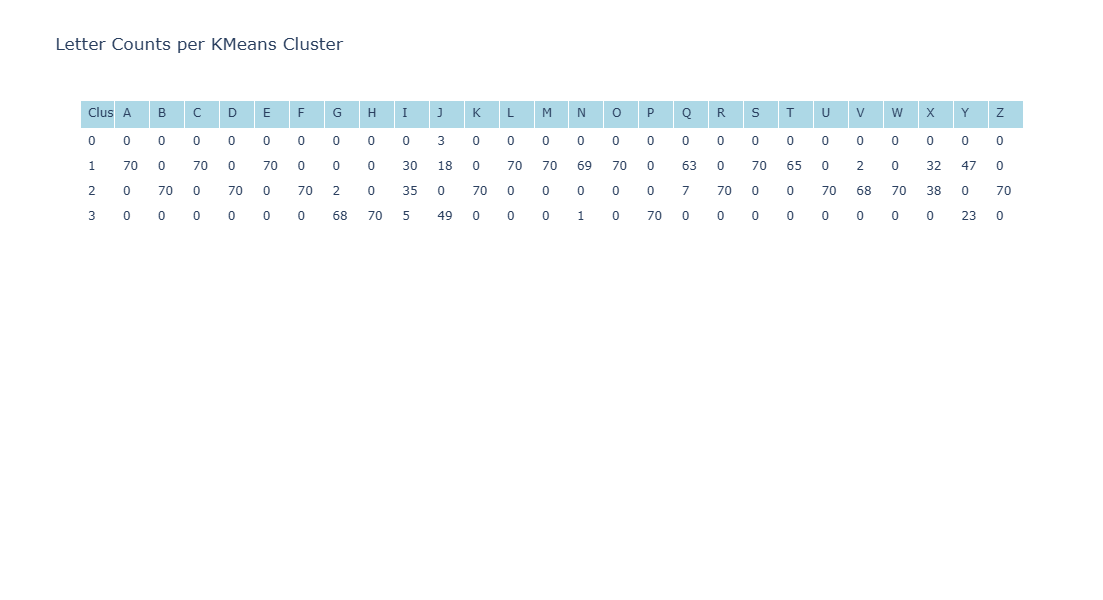

In [64]:
# Assuming letters_to_numbers is defined and y is your original list of letters (a-z lowercase or uppercase)
# y_letters = letters_to_numbers(y)  # Convert letters to numbers 1-26

# For counting, convert back to letters for clarity
# If y_letters are numbers 1-26, convert back to letters:
letters = [chr(n + 64) for n in y_letters]  # 1->A, 2->B, ..., 26->Z

# Convert letters to numeric values for plotting
label_to_index = {label: idx for idx, label in enumerate(sorted(set(y_letters)))}
y_numeric = np.array([label_to_index[label] for label in y_letters])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Dimensionality reduction for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Count letters per cluster
df = pd.DataFrame({'cluster': cluster_labels, 'letter': letters})
count_table = pd.crosstab(df['cluster'], df['letter'])

import plotly.graph_objects as go

# Create scrollable Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Cluster"] + list(count_table.columns),
        fill_color='lightblue',
        align='left'
    ),
    cells=dict(
        values=[count_table.index] + [count_table[col].tolist() for col in count_table.columns],
        fill_color='white',
        align='left',
        height=25
    )
)])

fig.update_layout(
    title="Letter Counts per KMeans Cluster",
    height=600,
    width=1000
)

fig.show()


Distribution of samples in initial clusters:
  Cluster 0: 40 samples
  Cluster 1: 26 samples
  Cluster 2: 46 samples
  Cluster 3: 38 samples
----------------------------------------
Number of samples in original Cluster 0: 40


C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



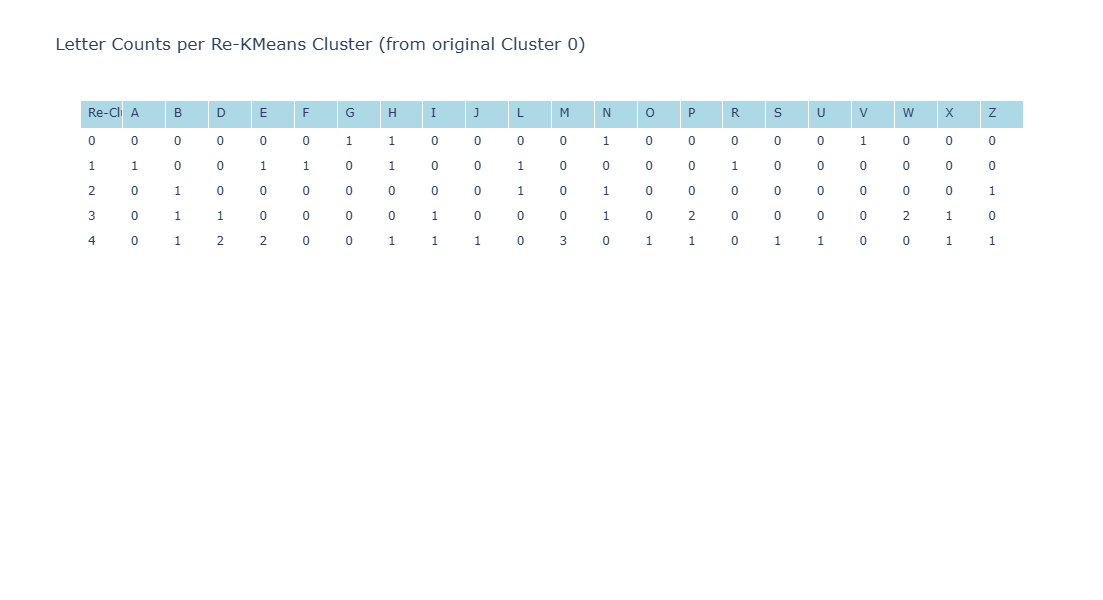


Running Elbow Method for X_cluster_0...


C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

WCSS values for K=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]: [25.282631007232347, 21.789137472343384, 19.404578340947705, 17.02777218081894, 15.526631340172086, 14.676032197005625, 14.080544345903116, 11.992380547742878, 11.491200952834104, 10.412715655866105]
Attempting to show Elbow Method plot for Cluster 0...


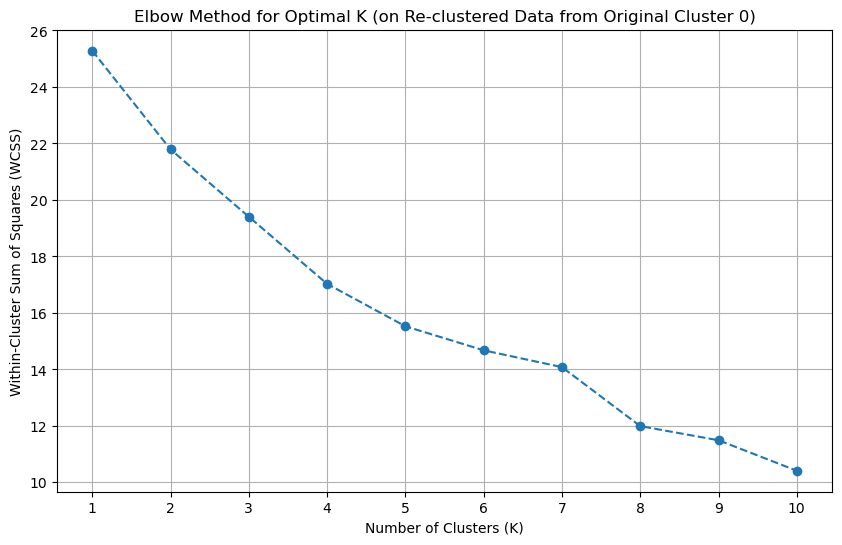


Interpretation of Elbow Method:
Look for the 'elbow' point in the graph where the rate of decrease in WCSS significantly slows down.
This point often indicates the optimal number of clusters (K).


In [110]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# --- Assume X and y (original numeric labels 1-26) are defined ---
# For demonstration, let's create dummy X and y for reproducibility
# In your actual code, X and y would be your ASL handshape features and original labels.
# Example:
# X = np.random.rand(100, 10) # 100 samples, 10 features
# y = np.random.randint(1, 27, 100) # 100 labels, numbers from 1 to 26

# --- IMPORTANT: Ensure X and y are defined for the rest of the code to run ---
# If you comment out the example above, make sure your actual X and y are loaded here.
# For this example to be runnable, let's keep the dummy data:
X = np.random.rand(150, 10) # Increased samples to make clusters more likely to have data
# Let's make sure some cluster numbers (0, 1, 2, 3) are likely to be present
y = np.random.randint(1, 27, 150) # Assuming y is labels that can be converted to letters

# Ensure y_letters is a list of actual letters (e.g., 'A', 'B', 'C')
# --- CORRECTED LINE HERE: changed np.issubtype to np.issubdtype ---
y_letters = [chr(n + 64) for n in y] if np.issubdtype(np.array(y).dtype, np.number) else y

# Initial KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
cluster_labels = kmeans.labels_

# --- Diagnostic: Check initial cluster distribution ---
print("Distribution of samples in initial clusters:")
unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
for cluster_id, count in zip(unique_clusters, counts):
    print(f"  Cluster {cluster_id}: {count} samples")
print("-" * 40)


# --- Code for Cluster 0 Analysis ---
target_cluster_id = 0 # Define the cluster ID you're interested in
cluster_0_indices = np.where(cluster_labels == target_cluster_id)[0]
X_cluster_0 = X[cluster_0_indices]
y_letters_cluster_0 = [y_letters[i] for i in cluster_0_indices]

print(f"Number of samples in original Cluster {target_cluster_id}: {len(X_cluster_0)}")

# --- Re-cluster Category 0 ---
if len(X_cluster_0) == 0:
    print(f"\nSkipping re-clustering and Elbow Method for Cluster {target_cluster_id} as it is empty.")
else:
    kmeans_recluster_0 = KMeans(n_clusters=5, random_state=42, n_init='auto')
    kmeans_recluster_0.fit(X_cluster_0)
    re_cluster_labels_0 = kmeans_recluster_0.labels_

    pca_recluster_0 = PCA(n_components=2)
    X_pca_recluster_0 = pca_recluster_0.fit_transform(X_cluster_0)

    df_recluster_0 = pd.DataFrame({'cluster': re_cluster_labels_0, 'letter': y_letters_cluster_0})
    count_table_recluster_0 = pd.crosstab(df_recluster_0['cluster'], df_recluster_0['letter'])

    fig_recluster_0 = go.Figure(data=[go.Table(
        header=dict(
            values=["Re-Cluster"] + list(count_table_recluster_0.columns),
            fill_color='lightblue',
            align='left'
        ),
        cells=dict(
            values=[count_table_recluster_0.index] + [count_table_recluster_0[col].tolist() for col in count_table_recluster_0.columns],
            fill_color='white',
            align='left',
            height=25
        )
    )])

    fig_recluster_0.update_layout(
        title=f"Letter Counts per Re-KMeans Cluster (from original Cluster {target_cluster_id})",
        height=600,
        width=1000
    )
    fig_recluster_0.show()


    # --- Elbow Method for X_cluster_0 ---
    # Determine a range of K values to test
    max_k = min(10, len(X_cluster_0) - 1)
    if max_k < 2:
        print(f"\nNot enough data points in X_cluster_{target_cluster_id} ({len(X_cluster_0)} samples) to run Elbow Method with multiple clusters.")
        print("Elbow Method plot requires at least 2 samples for meaningful clustering.")
    else:
        k_range = range(1, max_k + 1)
        wcss_0 = [] # List to store Within-Cluster Sum of Squares

        print(f"\nRunning Elbow Method for X_cluster_{target_cluster_id}...")
        for k in k_range:
            kmeans_elbow_0 = KMeans(n_clusters=k, random_state=42, n_init='auto')
            kmeans_elbow_0.fit(X_cluster_0)
            wcss_0.append(kmeans_elbow_0.inertia_)

        print(f"WCSS values for K={list(k_range)}: {wcss_0}")

        # Plotting the Elbow Method results using Matplotlib
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, wcss_0, marker='o', linestyle='--')
        plt.title(f'Elbow Method for Optimal K (on Re-clustered Data from Original Cluster {target_cluster_id})')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
        plt.xticks(list(k_range))
        plt.grid(True)
        print(f"Attempting to show Elbow Method plot for Cluster {target_cluster_id}...")
        plt.show()

        print("\nInterpretation of Elbow Method:")
        print("Look for the 'elbow' point in the graph where the rate of decrease in WCSS significantly slows down.")
        print("This point often indicates the optimal number of clusters (K).")

Distribution of samples in initial clusters:
  Cluster 0: 30 samples
  Cluster 1: 40 samples
  Cluster 2: 28 samples
  Cluster 3: 52 samples
----------------------------------------
Number of samples in original Cluster 1: 40


C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



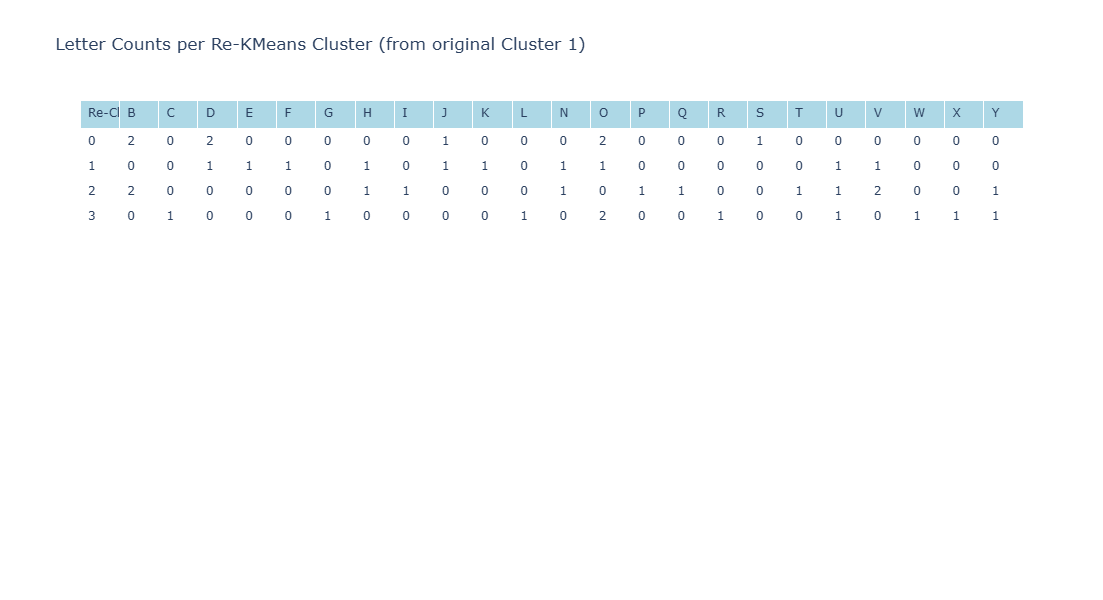


Running Elbow Method for X_cluster_1...


C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

WCSS values for K=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]: [26.2141215784399, 23.125531812172866, 20.398779555333974, 18.737092179023502, 16.923839770482953, 16.22268735337736, 14.602749129531173, 13.43429131677198, 12.332075371181926, 11.338047655089287]
Attempting to show Elbow Method plot for Cluster 1...


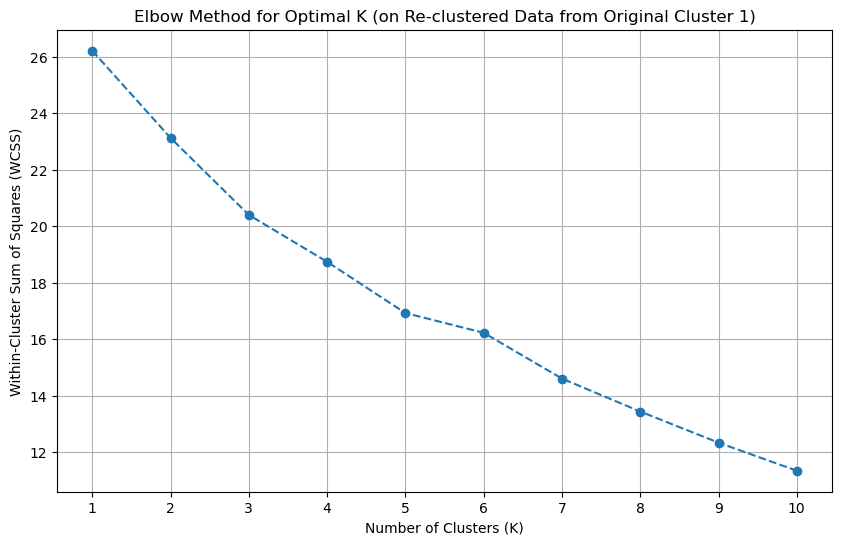


Interpretation of Elbow Method:
Look for the 'elbow' point in the graph where the rate of decrease in WCSS significantly slows down.
This point often indicates the optimal number of clusters (K).


In [100]:
# --- Assume X and y (original numeric labels 1-26) are defined ---
# For demonstration, let's create dummy X and y for reproducibility
# In your actual code, X and y would be your ASL handshape features and original labels.
# Example:
# X = np.random.rand(100, 10) # 100 samples, 10 features
# y = np.random.randint(1, 27, 100) # 100 labels, numbers from 1 to 26

# --- IMPORTANT: Ensure X and y are defined for the rest of the code to run ---
# If you comment out the example above, make sure your actual X and y are loaded here.
# For this example to be runnable, let's keep the dummy data:
X = np.random.rand(150, 10) # Increased samples to make clusters more likely to have data
# Let's make sure some cluster numbers (0, 1, 2, 3) are likely to be present
y = np.random.randint(1, 27, 150) # Assuming y is labels that can be converted to letters

# Ensure y_letters is a list of actual letters (e.g., 'A', 'B', 'C')
y_letters = [chr(n + 64) for n in y] if np.issubdtype(np.array(y).dtype, np.number) else y

# Initial KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
cluster_labels = kmeans.labels_

# --- Diagnostic: Check initial cluster distribution ---
print("Distribution of samples in initial clusters:")
unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
for cluster_id, count in zip(unique_clusters, counts):
    print(f"  Cluster {cluster_id}: {count} samples")
print("-" * 40)


# --- Isolate Category 1 ---
target_cluster_id = 1 # Define the cluster ID you're interested in
cluster_1_indices = np.where(cluster_labels == target_cluster_id)[0]
X_cluster_1 = X[cluster_1_indices]
y_letters_cluster_1 = [y_letters[i] for i in cluster_1_indices]

print(f"Number of samples in original Cluster {target_cluster_id}: {len(X_cluster_1)}")

# --- Re-cluster Category 1 ---
if len(X_cluster_1) == 0:
    print(f"\nSkipping re-clustering and Elbow Method for Cluster {target_cluster_id} as it is empty.")
else:
    kmeans_recluster_1 = KMeans(n_clusters=4, random_state=42, n_init='auto')
    kmeans_recluster_1.fit(X_cluster_1)
    re_cluster_labels_1 = kmeans_recluster_1.labels_

    pca_recluster_1 = PCA(n_components=2)
    X_pca_recluster_1 = pca_recluster_1.fit_transform(X_cluster_1)

    df_recluster_1 = pd.DataFrame({'cluster': re_cluster_labels_1, 'letter': y_letters_cluster_1})
    count_table_recluster_1 = pd.crosstab(df_recluster_1['cluster'], df_recluster_1['letter'])

    fig_recluster_1 = go.Figure(data=[go.Table(
        header=dict(
            values=["Re-Cluster"] + list(count_table_recluster_1.columns),
            fill_color='lightblue',
            align='left'
        ),
        cells=dict(
            values=[count_table_recluster_1.index] + [count_table_recluster_1[col].tolist() for col in count_table_recluster_1.columns],
            fill_color='white',
            align='left',
            height=25
        )
    )])

    fig_recluster_1.update_layout(
        title=f"Letter Counts per Re-KMeans Cluster (from original Cluster {target_cluster_id})",
        height=600,
        width=1000
    )
    fig_recluster_1.show()


    # --- Elbow Method for X_cluster_1 ---
    # Determine a range of K values to test
    # Ensure there are enough data points to create multiple clusters
    # max_k should be at least 2 for elbow method to be meaningful (1 cluster is trivial)
    max_k = min(10, len(X_cluster_1) - 1)
    if max_k < 2:
        print(f"\nNot enough data points in X_cluster_{target_cluster_id} ({len(X_cluster_1)} samples) to run Elbow Method with multiple clusters.")
        print("Elbow Method plot requires at least 2 samples for meaningful clustering.")
    else:
        k_range = range(1, max_k + 1)
        wcss_1 = [] # List to store Within-Cluster Sum of Squares

        print(f"\nRunning Elbow Method for X_cluster_{target_cluster_id}...")
        for k in k_range:
            kmeans_elbow_1 = KMeans(n_clusters=k, random_state=42, n_init='auto')
            kmeans_elbow_1.fit(X_cluster_1)
            wcss_1.append(kmeans_elbow_1.inertia_)

        print(f"WCSS values for K={list(k_range)}: {wcss_1}") # Print WCSS values

        # Plotting the Elbow Method results using Matplotlib
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, wcss_1, marker='o', linestyle='--')
        plt.title(f'Elbow Method for Optimal K (on Re-clustered Data from Original Cluster {target_cluster_id})')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
        plt.xticks(list(k_range))
        plt.grid(True)
        print(f"Attempting to show Elbow Method plot for Cluster {target_cluster_id}...") # Diagnostic print
        plt.show()

        print("\nInterpretation of Elbow Method:")
        print("Look for the 'elbow' point in the graph where the rate of decrease in WCSS significantly slows down.")
        print("This point often indicates the optimal number of clusters (K).")

Number of samples in original Cluster 2: 22


C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



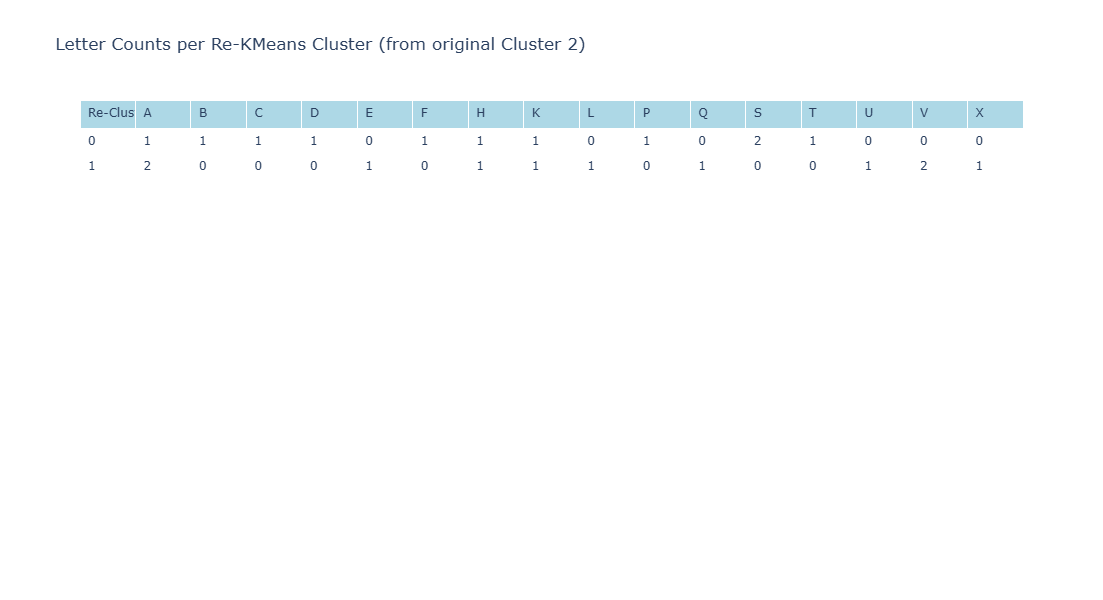


Running Elbow Method for X_cluster_2...


C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

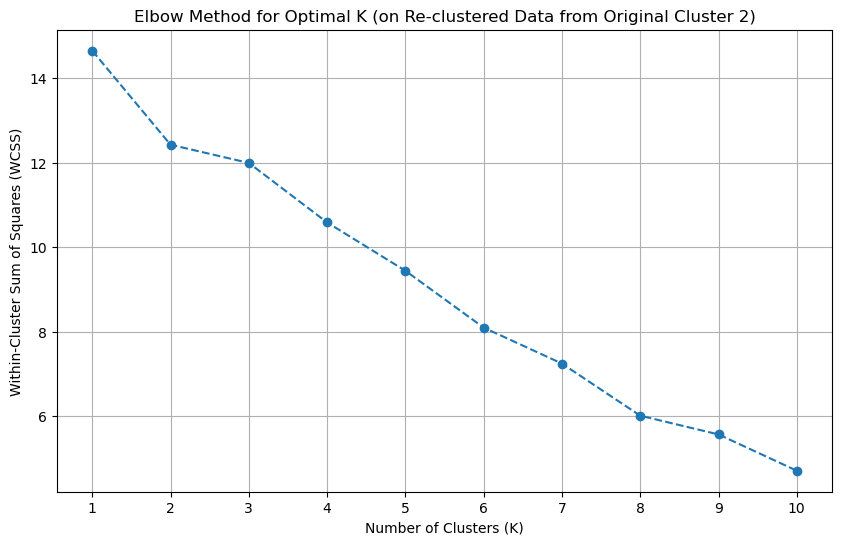


Interpretation of Elbow Method:
Look for the 'elbow' point in the graph where the rate of decrease in WCSS significantly slows down.
This point often indicates the optimal number of clusters (K).


In [94]:
# --- Assume X and y (original numeric labels 1-26) are defined ---
# For demonstration, let's create dummy X and y for reproducibility
# In your actual code, X and y would be your ASL handshape features and original labels.
# Example:
X = np.random.rand(100, 10) # 100 samples, 10 features
y = np.random.randint(1, 27, 100) # 100 labels, numbers from 1 to 26

# Ensure y_letters is a list of actual letters (e.g., 'A', 'B', 'C')
y_letters = [chr(n + 64) for n in y] if np.issubdtype(np.array(y).dtype, np.number) else y

# Initial KMeans clustering (as in your original code)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
cluster_labels = kmeans.labels_

# --- Isolate Category 2 ---
cluster_2_indices = np.where(cluster_labels == 2)[0]
X_cluster_2 = X[cluster_2_indices]
y_letters_cluster_2 = [y_letters[i] for i in cluster_2_indices]

print(f"Number of samples in original Cluster 2: {len(X_cluster_2)}")

# --- Re-cluster Category 2 ---
kmeans_recluster_2 = KMeans(n_clusters=2, random_state=42, n_init='auto') # Renamed variable
kmeans_recluster_2.fit(X_cluster_2)
re_cluster_labels_2 = kmeans_recluster_2.labels_ # Renamed variable

pca_recluster_2 = PCA(n_components=2) # Renamed variable
X_pca_recluster_2 = pca_recluster_2.fit_transform(X_cluster_2)

df_recluster_2 = pd.DataFrame({'cluster': re_cluster_labels_2, 'letter': y_letters_cluster_2}) # Renamed variable
count_table_recluster_2 = pd.crosstab(df_recluster_2['cluster'], df_recluster_2['letter']) # Renamed variable

fig_recluster_2 = go.Figure(data=[go.Table( # Renamed variable
    header=dict(
        values=["Re-Cluster"] + list(count_table_recluster_2.columns),
        fill_color='lightblue',
        align='left'
    ),
    cells=dict(
        values=[count_table_recluster_2.index] + [count_table_recluster_2[col].tolist() for col in count_table_recluster_2.columns],
        fill_color='white',
        align='left',
        height=25
    )
)])

fig_recluster_2.update_layout(
    title="Letter Counts per Re-KMeans Cluster (from original Cluster 2)", # Changed title
    height=600,
    width=1000
)

fig_recluster_2.show()

# --- Elbow Method for X_cluster_2 ---
# Determine a range of K values to test
max_k = min(10, len(X_cluster_2) - 1) # Changed from X_cluster_3 to X_cluster_2
if max_k < 2:
    print("Not enough data points in X_cluster_2 to run Elbow Method with multiple clusters.") # Changed print
else:
    k_range = range(1, max_k + 1)
    wcss_2 = [] # List to store Within-Cluster Sum of Squares (renamed variable)

    print("\nRunning Elbow Method for X_cluster_2...") # Changed print
    for k in k_range:
        kmeans_elbow_2 = KMeans(n_clusters=k, random_state=42, n_init='auto') # Renamed variable
        kmeans_elbow_2.fit(X_cluster_2) # Changed from X_cluster_3 to X_cluster_2
        wcss_2.append(kmeans_elbow_2.inertia_) # inertia_ is the WCSS (renamed variable)

    # Plotting the Elbow Method results using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss_2, marker='o', linestyle='--') # Changed wcss
    plt.title('Elbow Method for Optimal K (on Re-clustered Data from Original Cluster 2)') # Changed title
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(list(k_range))
    plt.grid(True)
    plt.show()

    print("\nInterpretation of Elbow Method:")
    print("Look for the 'elbow' point in the graph where the rate of decrease in WCSS significantly slows down.")
    print("This point often indicates the optimal number of clusters (K).")

Number of samples in original Cluster 3: 286


C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



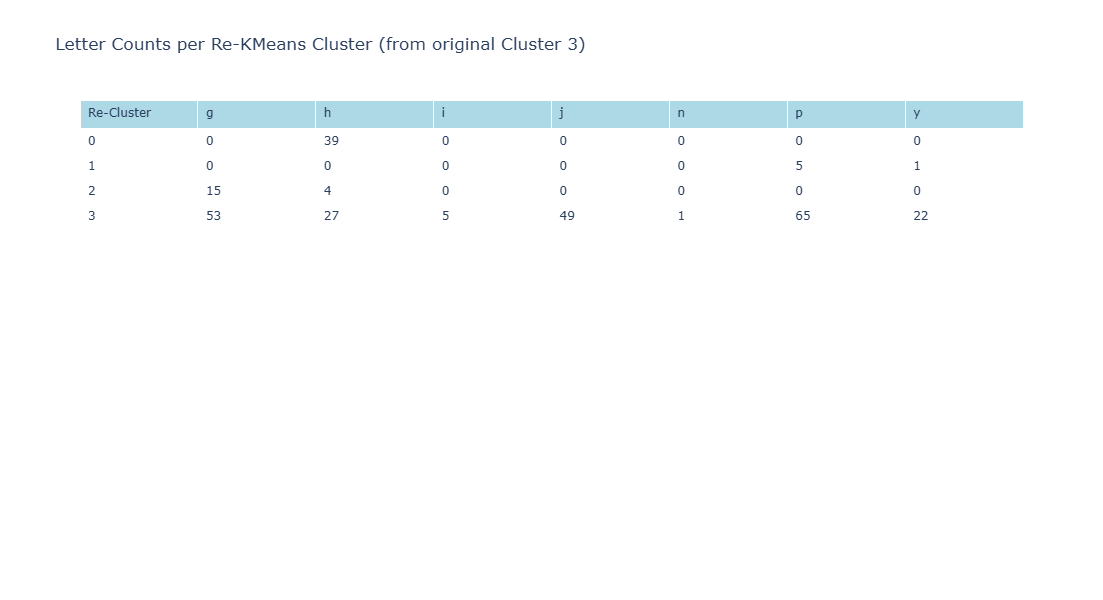


Running Elbow Method for X_cluster_3...


C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\rbecc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

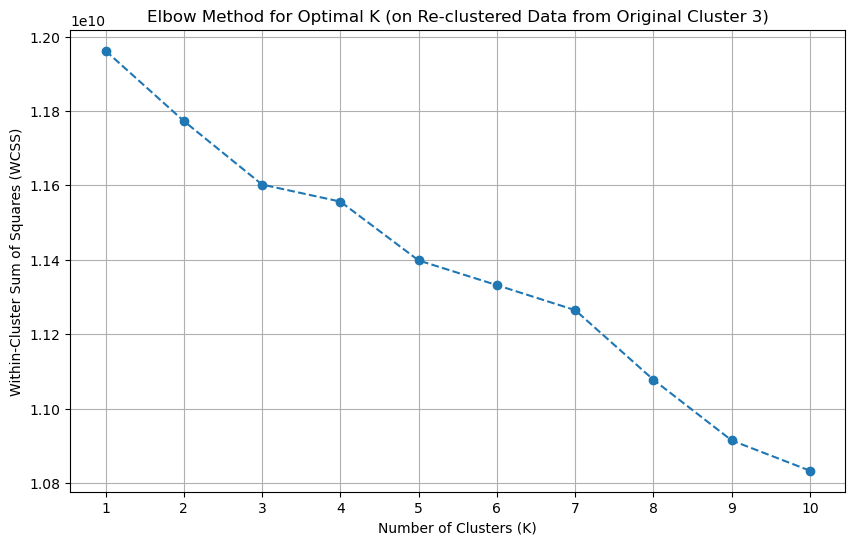


Interpretation of Elbow Method:
Look for the 'elbow' point in the graph where the rate of decrease in WCSS significantly slows down.
This point often indicates the optimal number of clusters (K).


In [65]:
# --- Assume X and y (original numeric labels 1-26) are defined ---
# For demonstration, let's create dummy X and y for reproducibility
# In your actual code, X and y would be your ASL handshape features and original labels.
# Example:
# X = np.random.rand(100, 10) # 100 samples, 10 features
# y = np.random.randint(1, 27, 100) # 100 labels, numbers from 1 to 26

# Ensure y_letters is a list of actual letters (e.g., 'A', 'B', 'C')
y_letters = [chr(n + 64) for n in y] if np.issubdtype(np.array(y).dtype, np.number) else y

# Initial KMeans clustering (as in your original code)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
cluster_labels = kmeans.labels_

# --- Isolate Category 3 ---
cluster_3_indices = np.where(cluster_labels == 3)[0]
X_cluster_3 = X[cluster_3_indices]
y_letters_cluster_3 = [y_letters[i] for i in cluster_3_indices]

print(f"Number of samples in original Cluster 3: {len(X_cluster_3)}")

# --- Re-cluster Category 3 (as in previous response) ---
kmeans_recluster = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_recluster.fit(X_cluster_3)
re_cluster_labels = kmeans_recluster.labels_

pca_recluster = PCA(n_components=2)
X_pca_recluster = pca_recluster.fit_transform(X_cluster_3)

df_recluster = pd.DataFrame({'cluster': re_cluster_labels, 'letter': y_letters_cluster_3})
count_table_recluster = pd.crosstab(df_recluster['cluster'], df_recluster['letter'])

fig_recluster = go.Figure(data=[go.Table(
    header=dict(
        values=["Re-Cluster"] + list(count_table_recluster.columns),
        fill_color='lightblue',
        align='left'
    ),
    cells=dict(
        values=[count_table_recluster.index] + [count_table_recluster[col].tolist() for col in count_table_recluster.columns],
        fill_color='white',
        align='left',
        height=25
    )
)])

fig_recluster.update_layout(
    title="Letter Counts per Re-KMeans Cluster (from original Cluster 3)",
    height=600,
    width=1000
)

fig_recluster.show()

# --- Elbow Method for X_cluster_3 ---
# Determine a range of K values to test
max_k = min(10, len(X_cluster_3) - 1) # Don't test more clusters than data points - 1
if max_k < 2:
    print("Not enough data points in X_cluster_3 to run Elbow Method with multiple clusters.")
else:
    k_range = range(1, max_k + 1)
    wcss = [] # List to store Within-Cluster Sum of Squares

    print("\nRunning Elbow Method for X_cluster_3...")
    for k in k_range:
        kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans_elbow.fit(X_cluster_3)
        wcss.append(kmeans_elbow.inertia_) # inertia_ is the WCSS

    # Plotting the Elbow Method results using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal K (on Re-clustered Data from Original Cluster 3)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(list(k_range))
    plt.grid(True)
    plt.show()

    print("\nInterpretation of Elbow Method:")
    print("Look for the 'elbow' point in the graph where the rate of decrease in WCSS significantly slows down.")
    print("This point often indicates the optimal number of clusters (K).")